Import Data and Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [4]:
titanic = pd.read_csv('/content/train_dataset.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.shape

(891, 12)

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
print("Survived :", titanic.Survived.unique())
print("Pclass :", titanic.Pclass.unique())
print("Gender :", titanic.Sex.unique())
print("Embarked :", titanic.Embarked.dropna().unique())

Check for duplicates


In [6]:
titanic.duplicated().sum()

np.int64(0)

In [7]:
titanic.drop_duplicates(inplace=True)

Dealing with missing values

In [8]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


- If number of missing values in a column is very large wrt total values then dropping that column is a suitable strategy

In [9]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


 - In numerical columns missing values can be replaced by the mean or median of that column.

<Axes: xlabel='Age', ylabel='Density'>

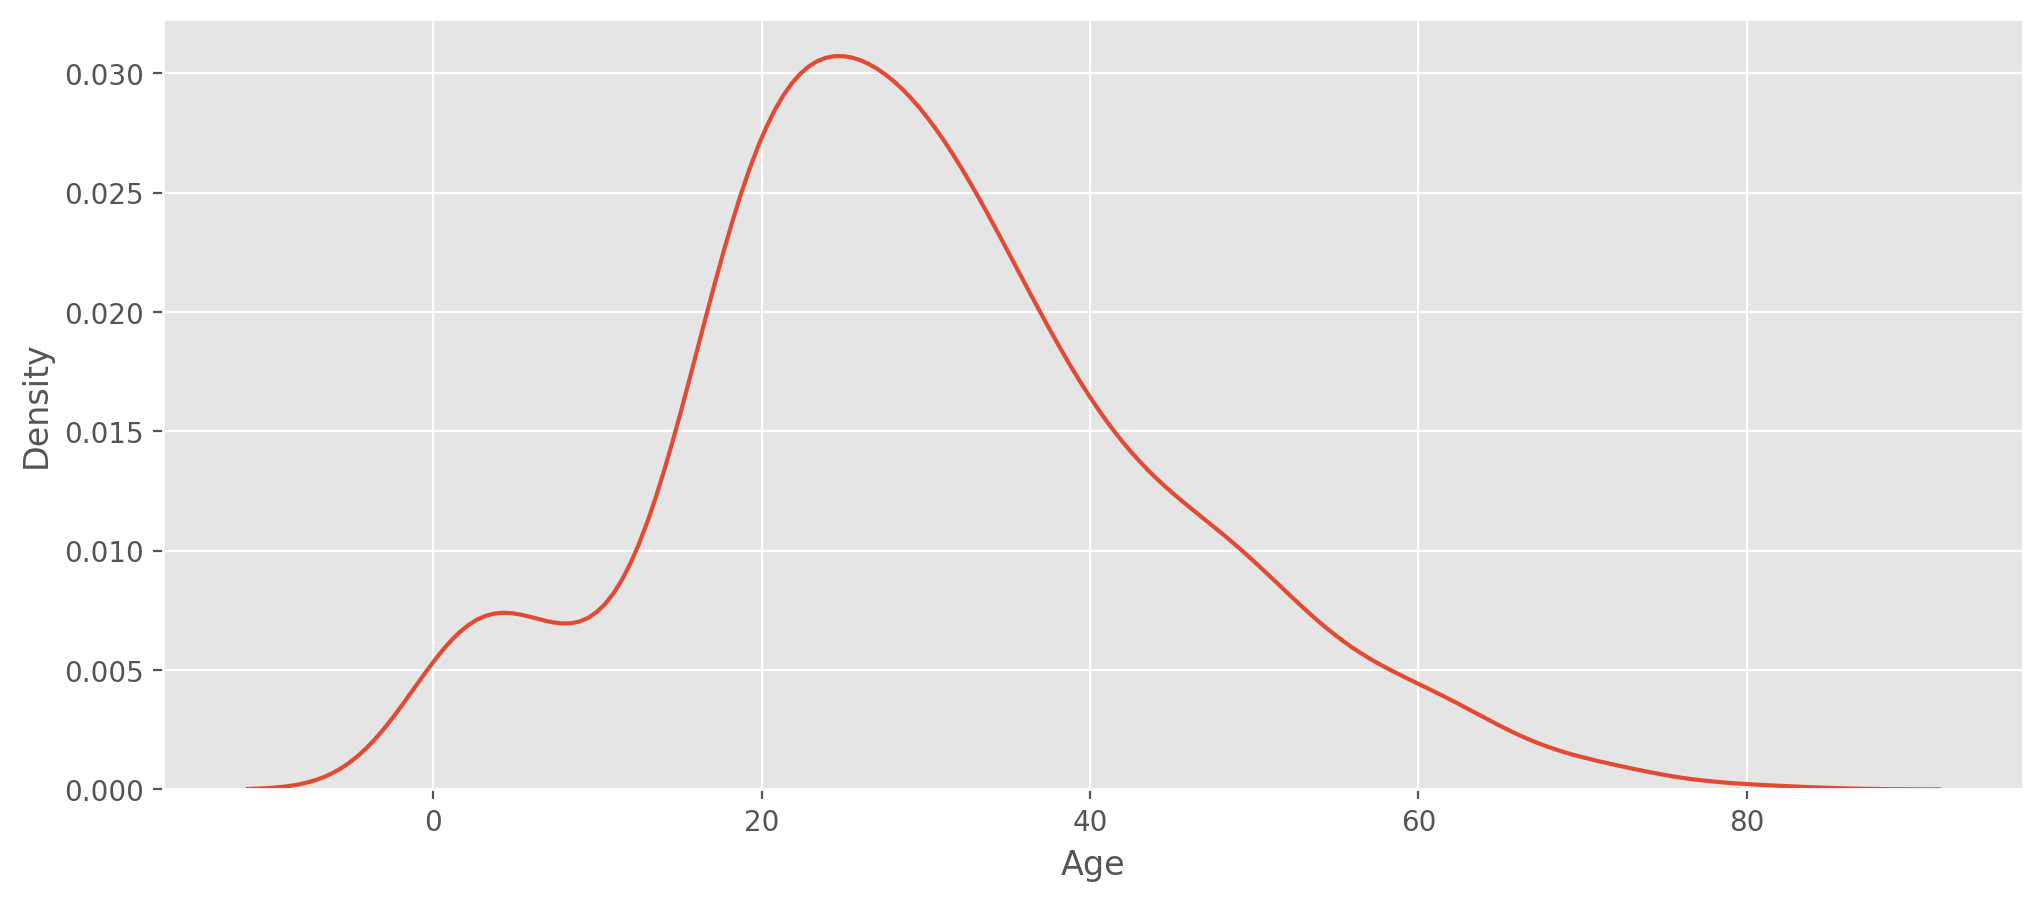

In [11]:
plt.figure(figsize=(12,5),dpi=200)
sns.distplot(titanic.Age,hist=False)

 - Missing values in a categorical column can be replaced by the mode of the column
 - If the number of rows having missing values if too small compared to total rows, then they can be dropped.

In [12]:
mean_age = titanic.Age.mean()
titanic.Age.replace(np.nan, mean_age,inplace=True)

In [13]:
titanic.Age.isnull().sum()

np.int64(0)

 - Missing values in a categorical column can be replaced by the mode of the column

In [14]:
mode_emb = titanic.Embarked.mode()[0]
titanic.Embarked.replace(np.nan, mode_emb,inplace=True)

In [15]:
titanic.Embarked.isnull().sum()

np.int64(0)

Strategies to deal with missing values

- If number of missing values in a column is very large wrt total values then dropping that column is a suitable strategy.
- In numerical columns missing values can be replaced by the mean or median of that column.
- In categorical columns missing values can be replaced with mode.
- If number of rows having missing values is very small w.r.t total rows then these rows can be dropped.

      titanic.dropna(inplace=True)

In [10]:
#creating a new column family_members by adding SibSp and Parch
titanic['family_members'] = titanic.SibSp+ titanic.Parch
titanic.drop(['SibSp','Parch'],axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

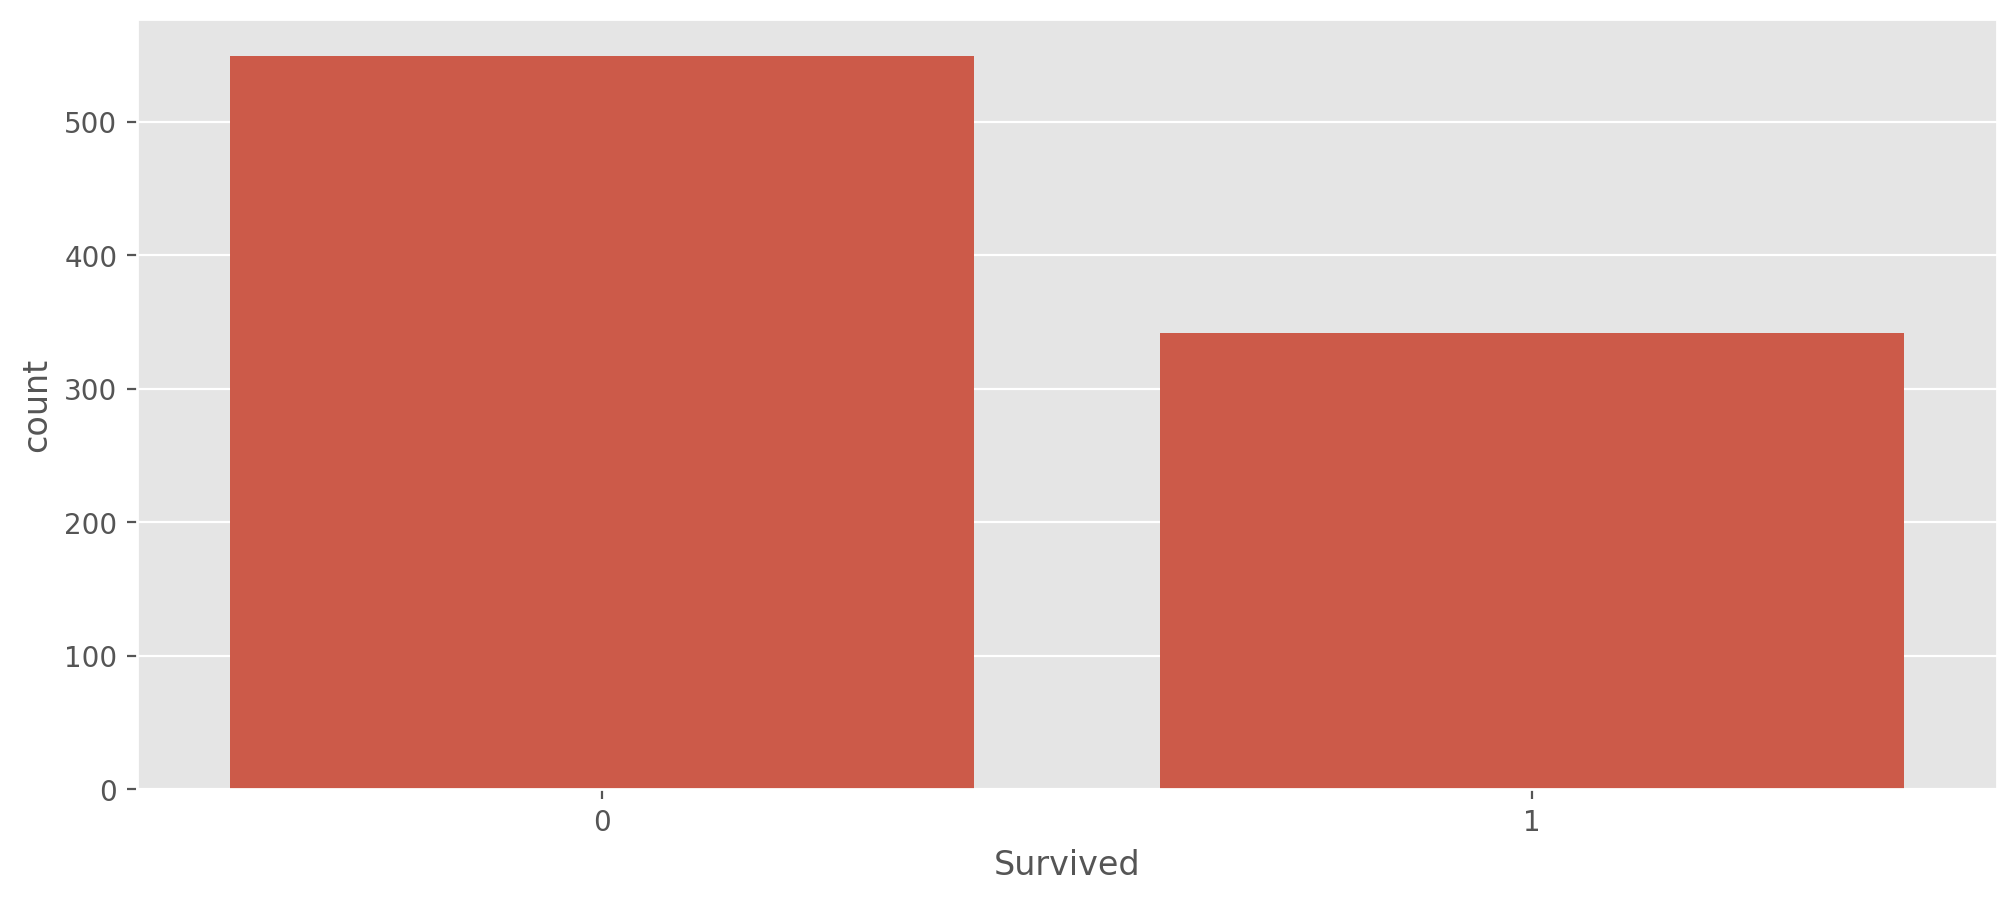

In [19]:
#How many passengers survived and how many did not survive
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='Survived',data=titanic)

In [16]:
titanic.Survived.value_counts()

,count
Survived,
0,549
1,342


In [20]:
survived = titanic.Survived.value_counts(normalize=True)
print('Percentage of Surviors: ',round(survived[1]*100,2))
print('Percentage of Dead: ',round(survived[0]*100,2))

Percentage of Surviors:  38.38
Percentage of Dead:  61.62


<Axes: xlabel='Sex', ylabel='count'>

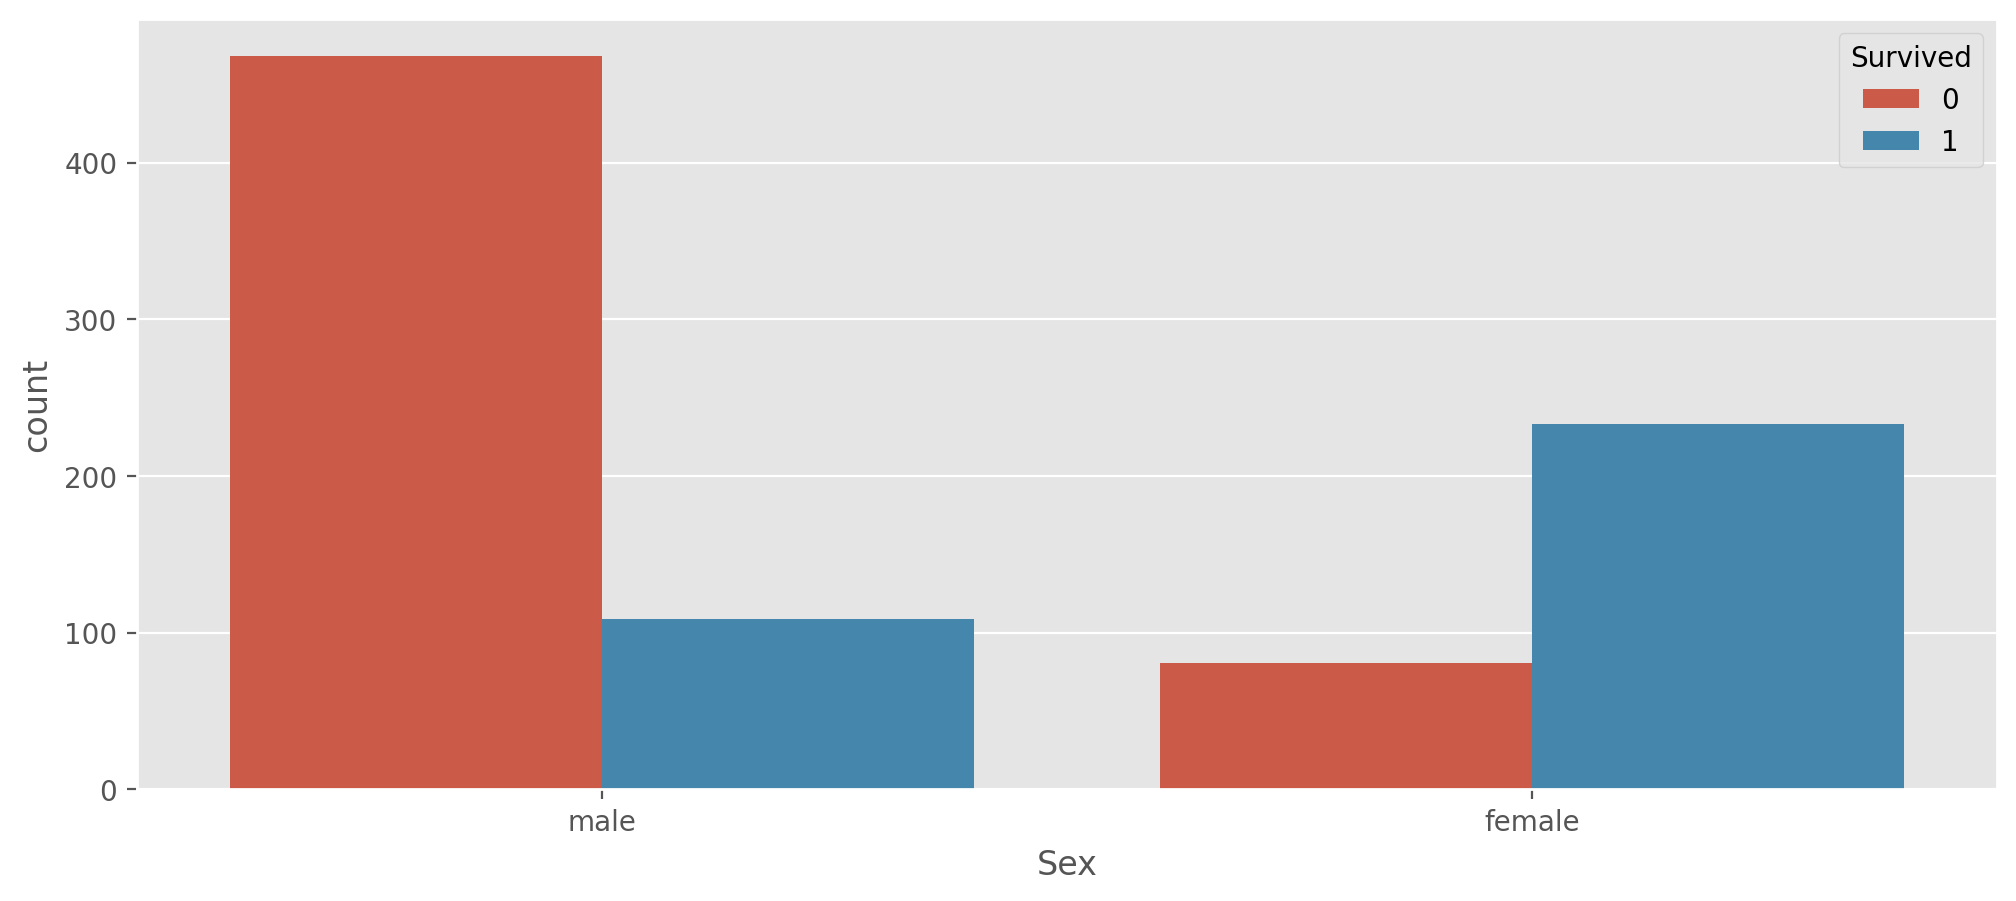

In [21]:
#Analysing gender and survival
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(data=titanic,x='Sex',hue='Survived')

In [22]:
svl_rate = titanic.groupby('Sex')['Survived'].value_counts(normalize=True)
print(svl_rate)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64


In [24]:
print('Percentage of female survivors : ',round(svl_rate['female'][1]*100,2))
print('Percentage of dead females     : ',round(svl_rate['female'][0]*100,2))
print('Percentage of male survivors   : ',round(svl_rate['male'][1]*100,2))
print('percentage of dead males       : ',round(svl_rate['male'][0]*100,2))

Percentage of female survivors :  74.2
Percentage of dead females     :  25.8
Percentage of male survivors   :  18.89
percentage of dead males       :  81.11


Text(0.5, 1.0, 'Female Survivors')

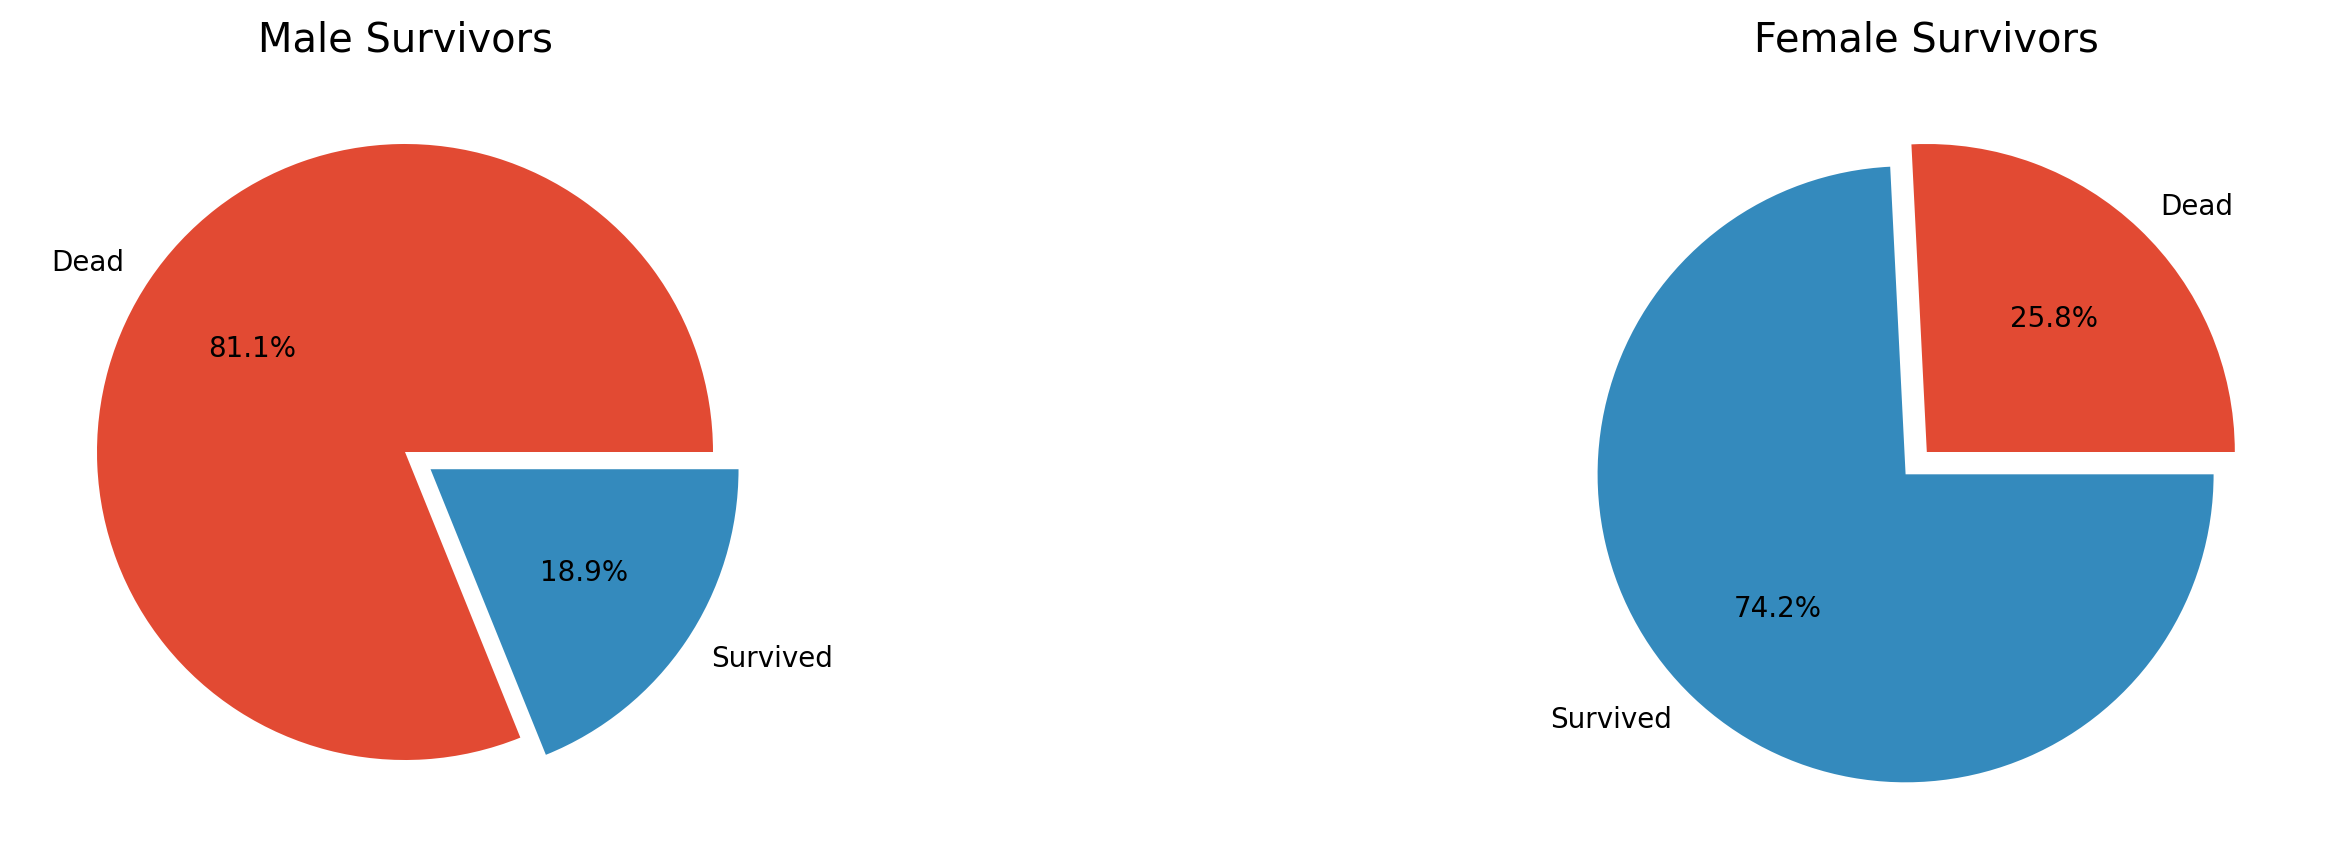

In [25]:
svl_rate =svl_rate.sort_index()
males=svl_rate['male']
females = svl_rate['female']
labels = ['Dead','Survived']

plt.figure(figsize=(18,5),dpi=200,facecolor='white')
plt.subplot(1,2,1)
plt.pie(males,labels=labels,autopct='%1.1f%%',explode=[0,0.1])
plt.title('Male Survivors')
plt.subplot(1,2,2)
plt.pie(females,labels=labels,autopct='%1.1f%%',explode=[0,0.1])
plt.title('Female Survivors')
# plt.show()


<Axes: xlabel='Pclass', ylabel='count'>

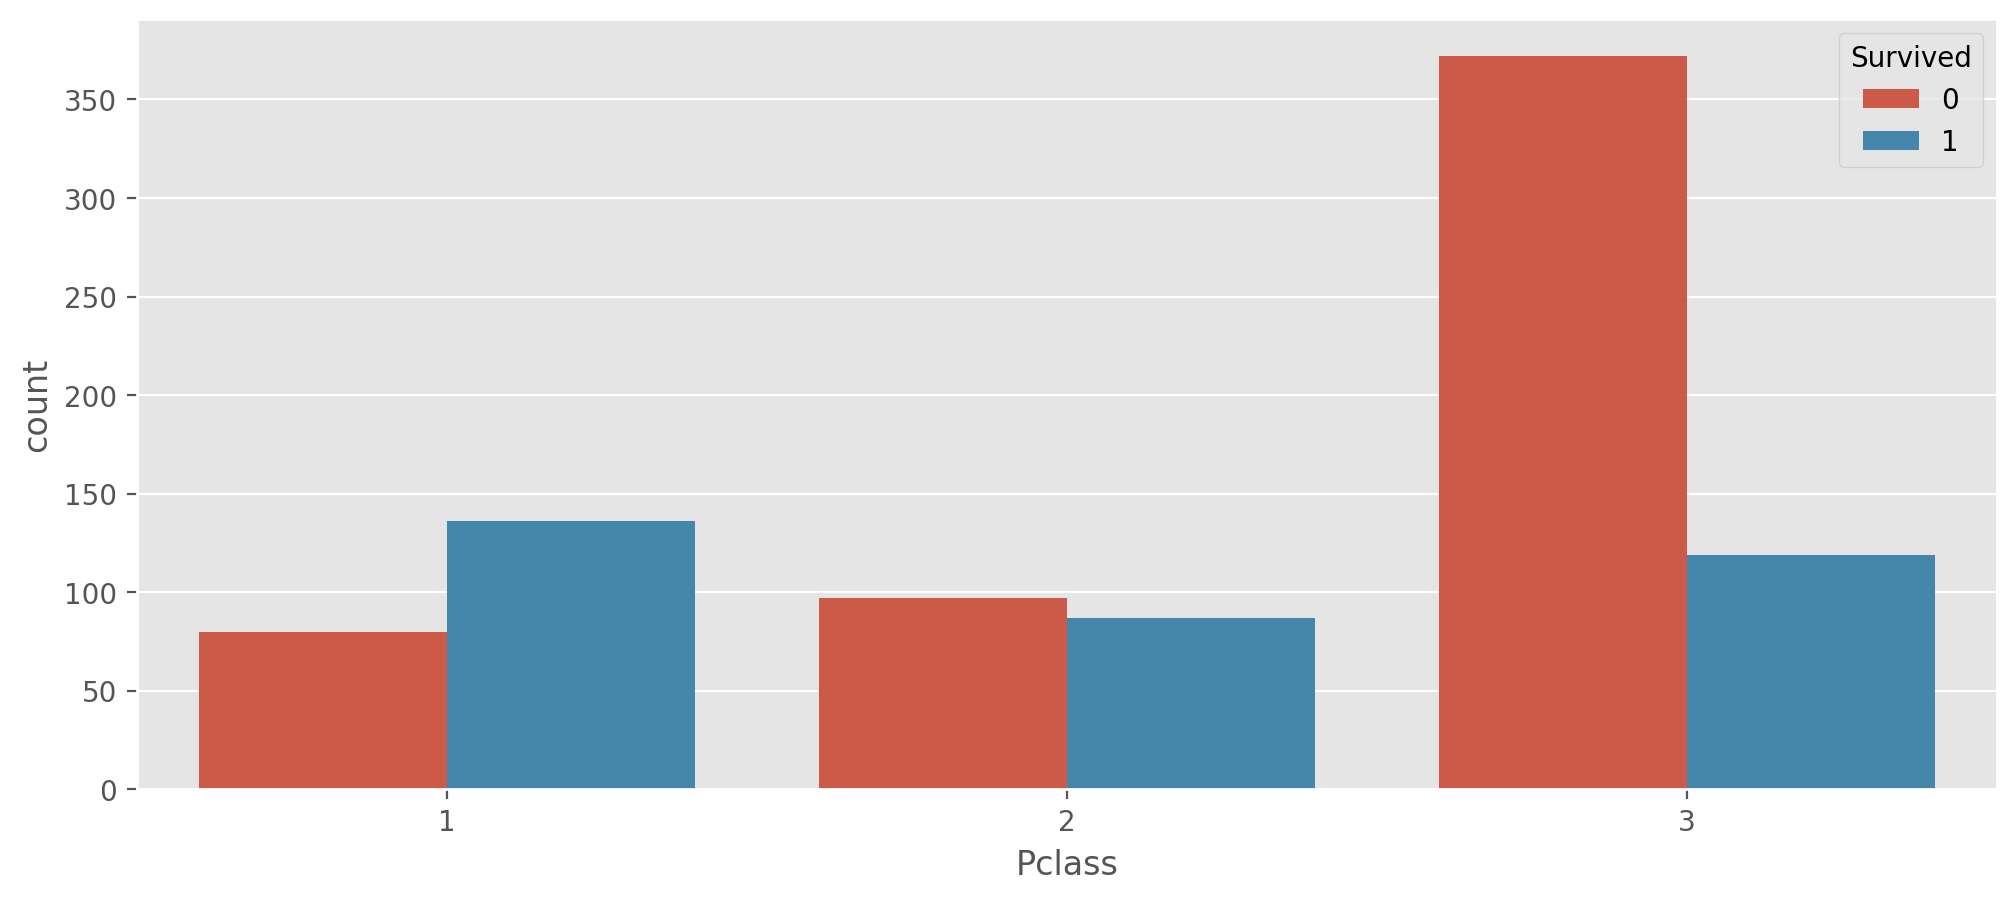

In [26]:
#Analysing passenger class and survival
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(data=titanic,x='Pclass',hue='Survived')

In [27]:
svl_rate = titanic.groupby('Pclass')['Survived'].value_counts(normalize=True)
print(svl_rate)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64


In [28]:
print('Percentage of 1st passenger class Survivors: ', round(svl_rate[1][1]*100,2),'%')
print('Percentage of 1st passenger class Dead: ', round(svl_rate[1][0]*100,2),'%')
print('Percentage of 2nd passenger class Survivors: ', round(svl_rate[2][1]*100,2),'%')
print('Percentage of 2nd passenger class Dead: ', round(svl_rate[2][0]*100,2),'%')
print('Percentage of 3rd passenger class Survivors: ', round(svl_rate[3][1]*100,2),'%')
print('Percentage of 3rd passenger class Dead: ', round(svl_rate[3][0]*100,2),'%')


Percentage of 1st passenger class Survivors:  62.96 %
Percentage of 1st passenger class Dead:  37.04 %
Percentage of 2nd passenger class Survivors:  47.28 %
Percentage of 2nd passenger class Dead:  52.72 %
Percentage of 3rd passenger class Survivors:  24.24 %
Percentage of 3rd passenger class Dead:  75.76 %


Text(0.5, 1.0, 'Passenger Class3')

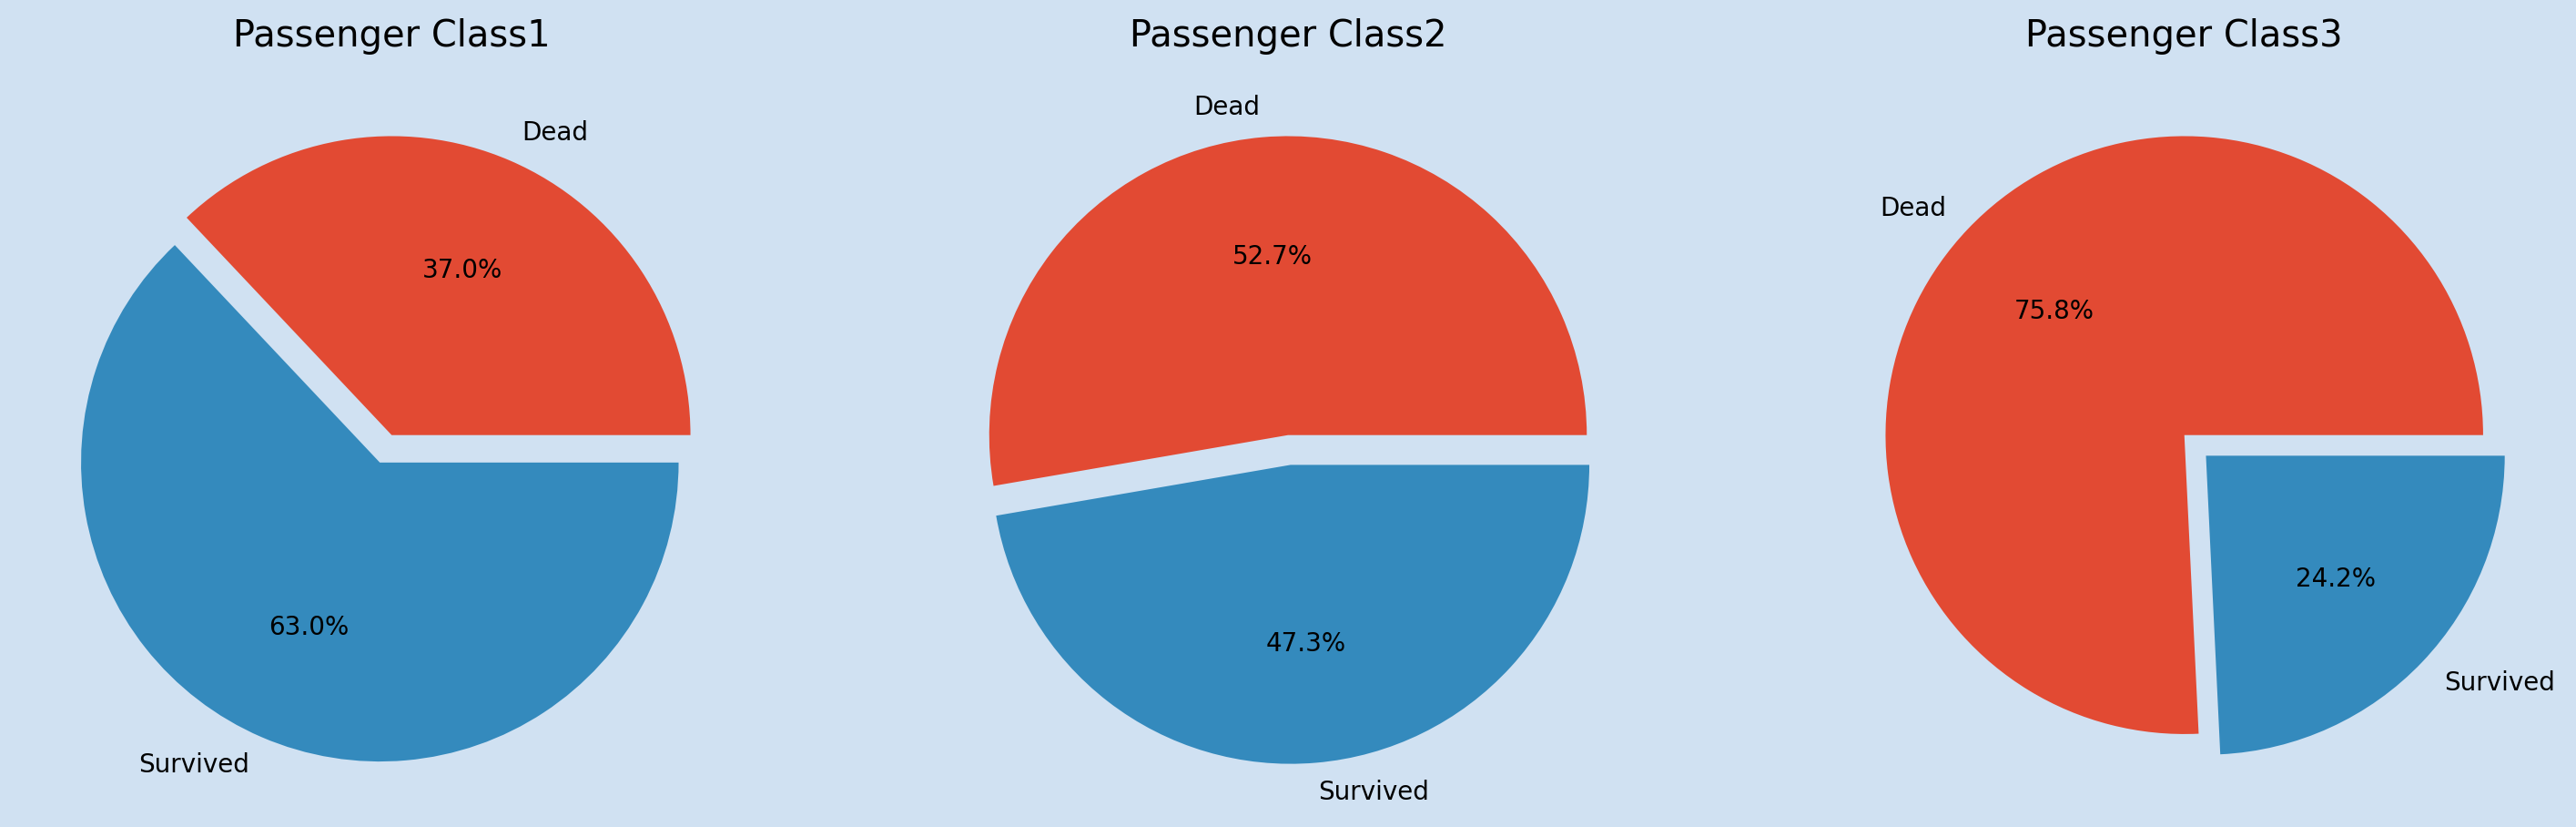

In [30]:
svl_rate = svl_rate.sort_index()
pclass1, pclass2, pclass3 = svl_rate[1], svl_rate[2], svl_rate[3]
labels = ['Dead','Survived']

plt.figure(figsize=(18,6),dpi=200,facecolor='#d0e1f2')
plt.subplot(1,3,1)
plt.pie(pclass1,labels=labels,autopct='%1.1f%%',explode=[0,0.1])
plt.title('Passenger Class1')
plt.subplot(1,3,2)
plt.pie(pclass2,labels=labels,autopct='%1.1f%%',explode=[0,0.1])
plt.title('Passenger Class2')
plt.subplot(1,3,3)
plt.pie(pclass3,labels=labels,autopct='%1.1f%%',explode=[0,0.1])
plt.title('Passenger Class3')

<Axes: xlabel='Embarked', ylabel='count'>

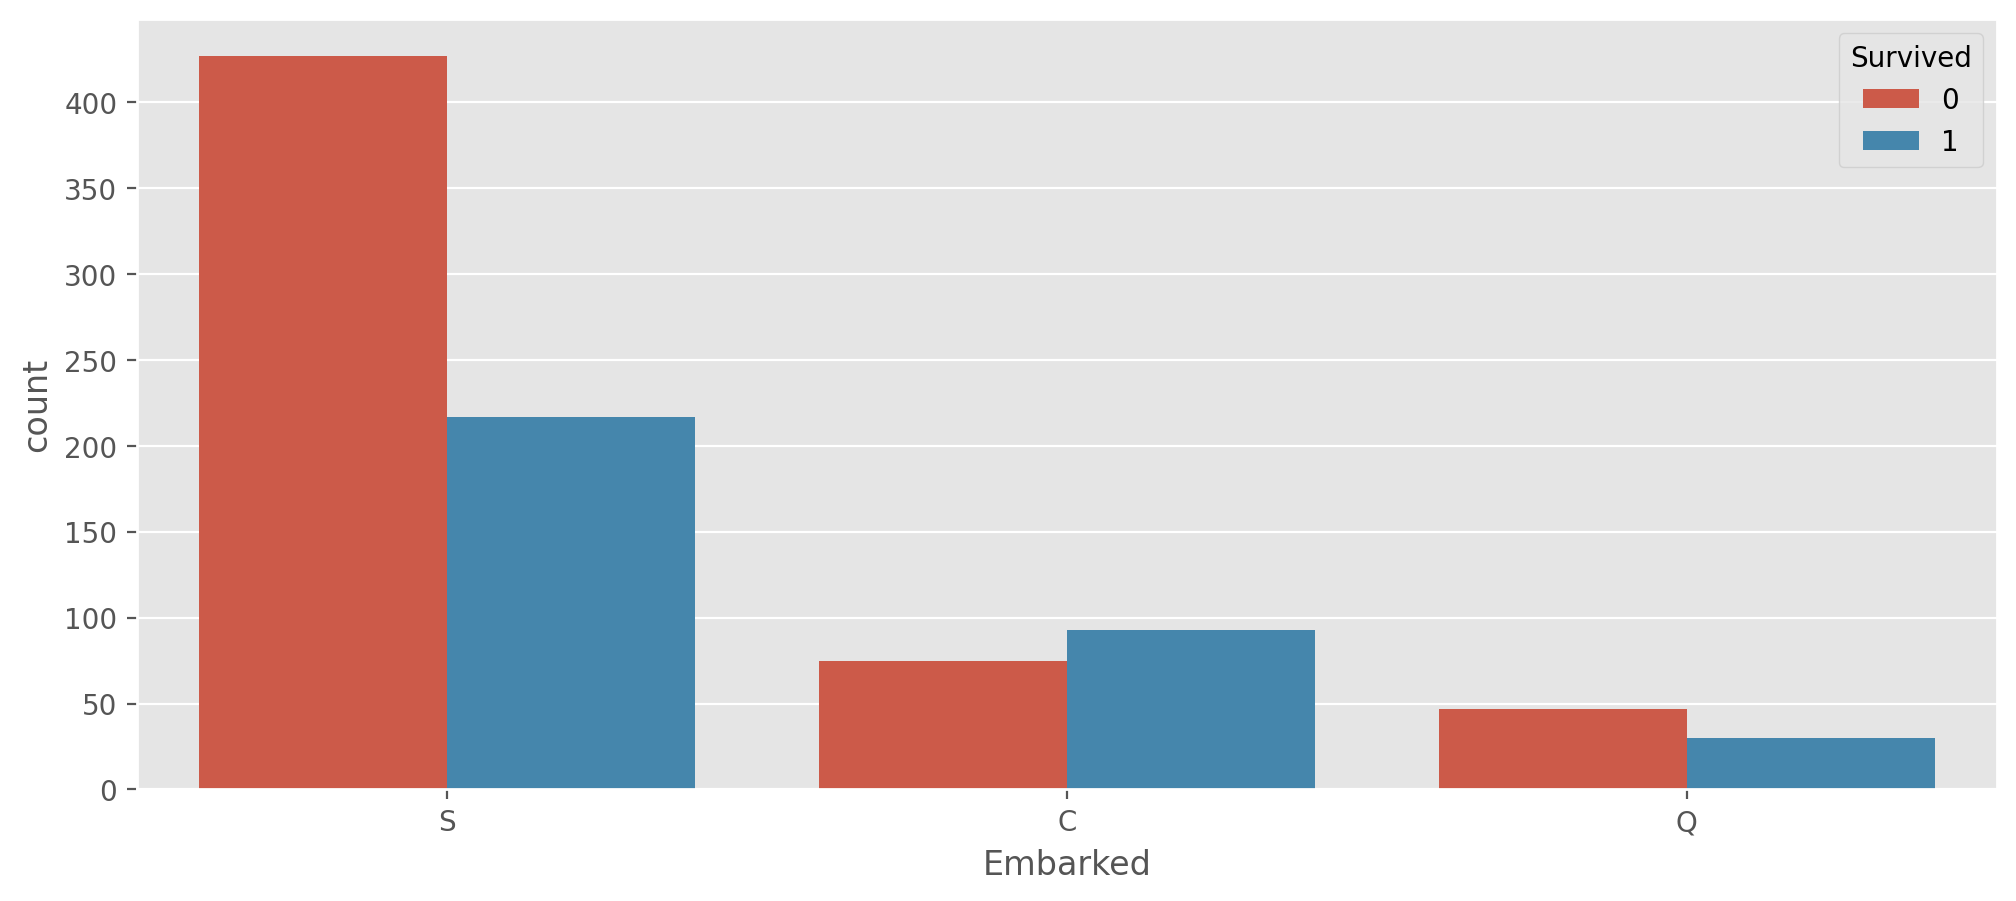

In [31]:
#analysing Embarked and survival
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(data=titanic,x='Embarked',hue='Survived')

In [32]:
svl_rate = titanic.groupby('Embarked')['Survived'].value_counts(normalize=True)
print(svl_rate)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: proportion, dtype: float64


<Axes: xlabel='Pclass', ylabel='Fare'>

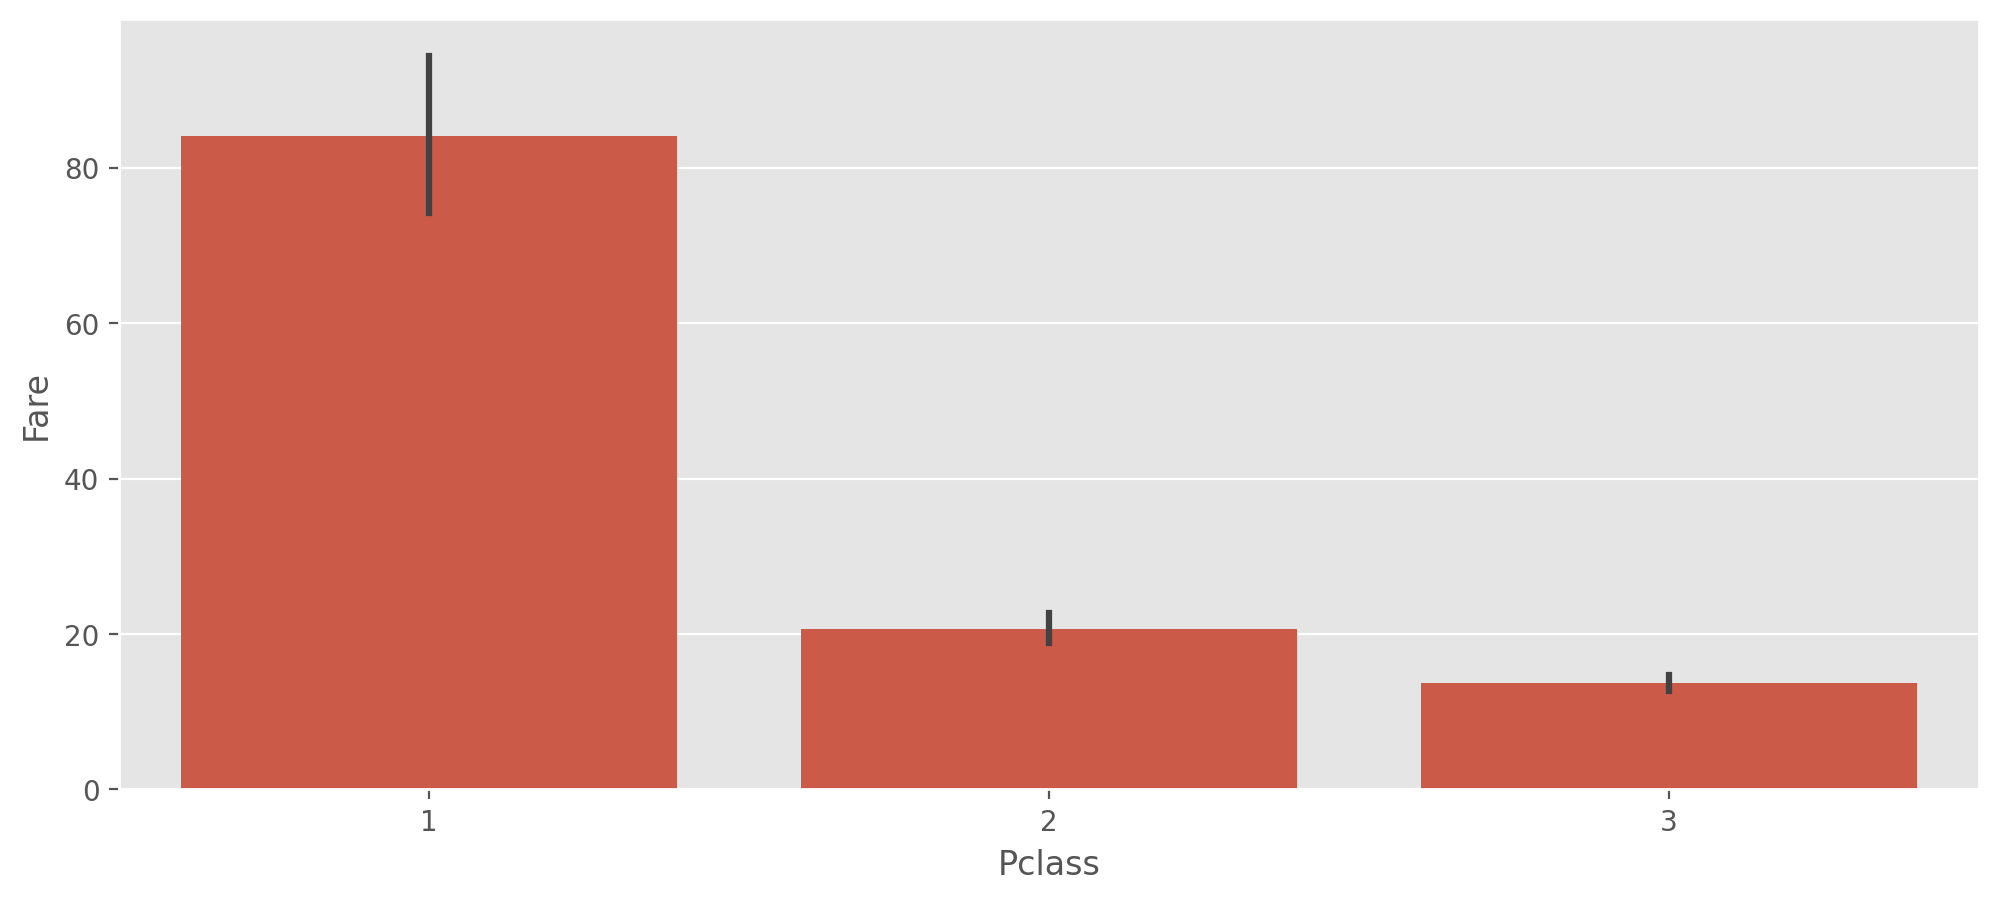

In [33]:
#Fare and Passenger class
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(data=titanic,x='Pclass',y='Fare')

<Axes: xlabel='Pclass', ylabel='Fare'>

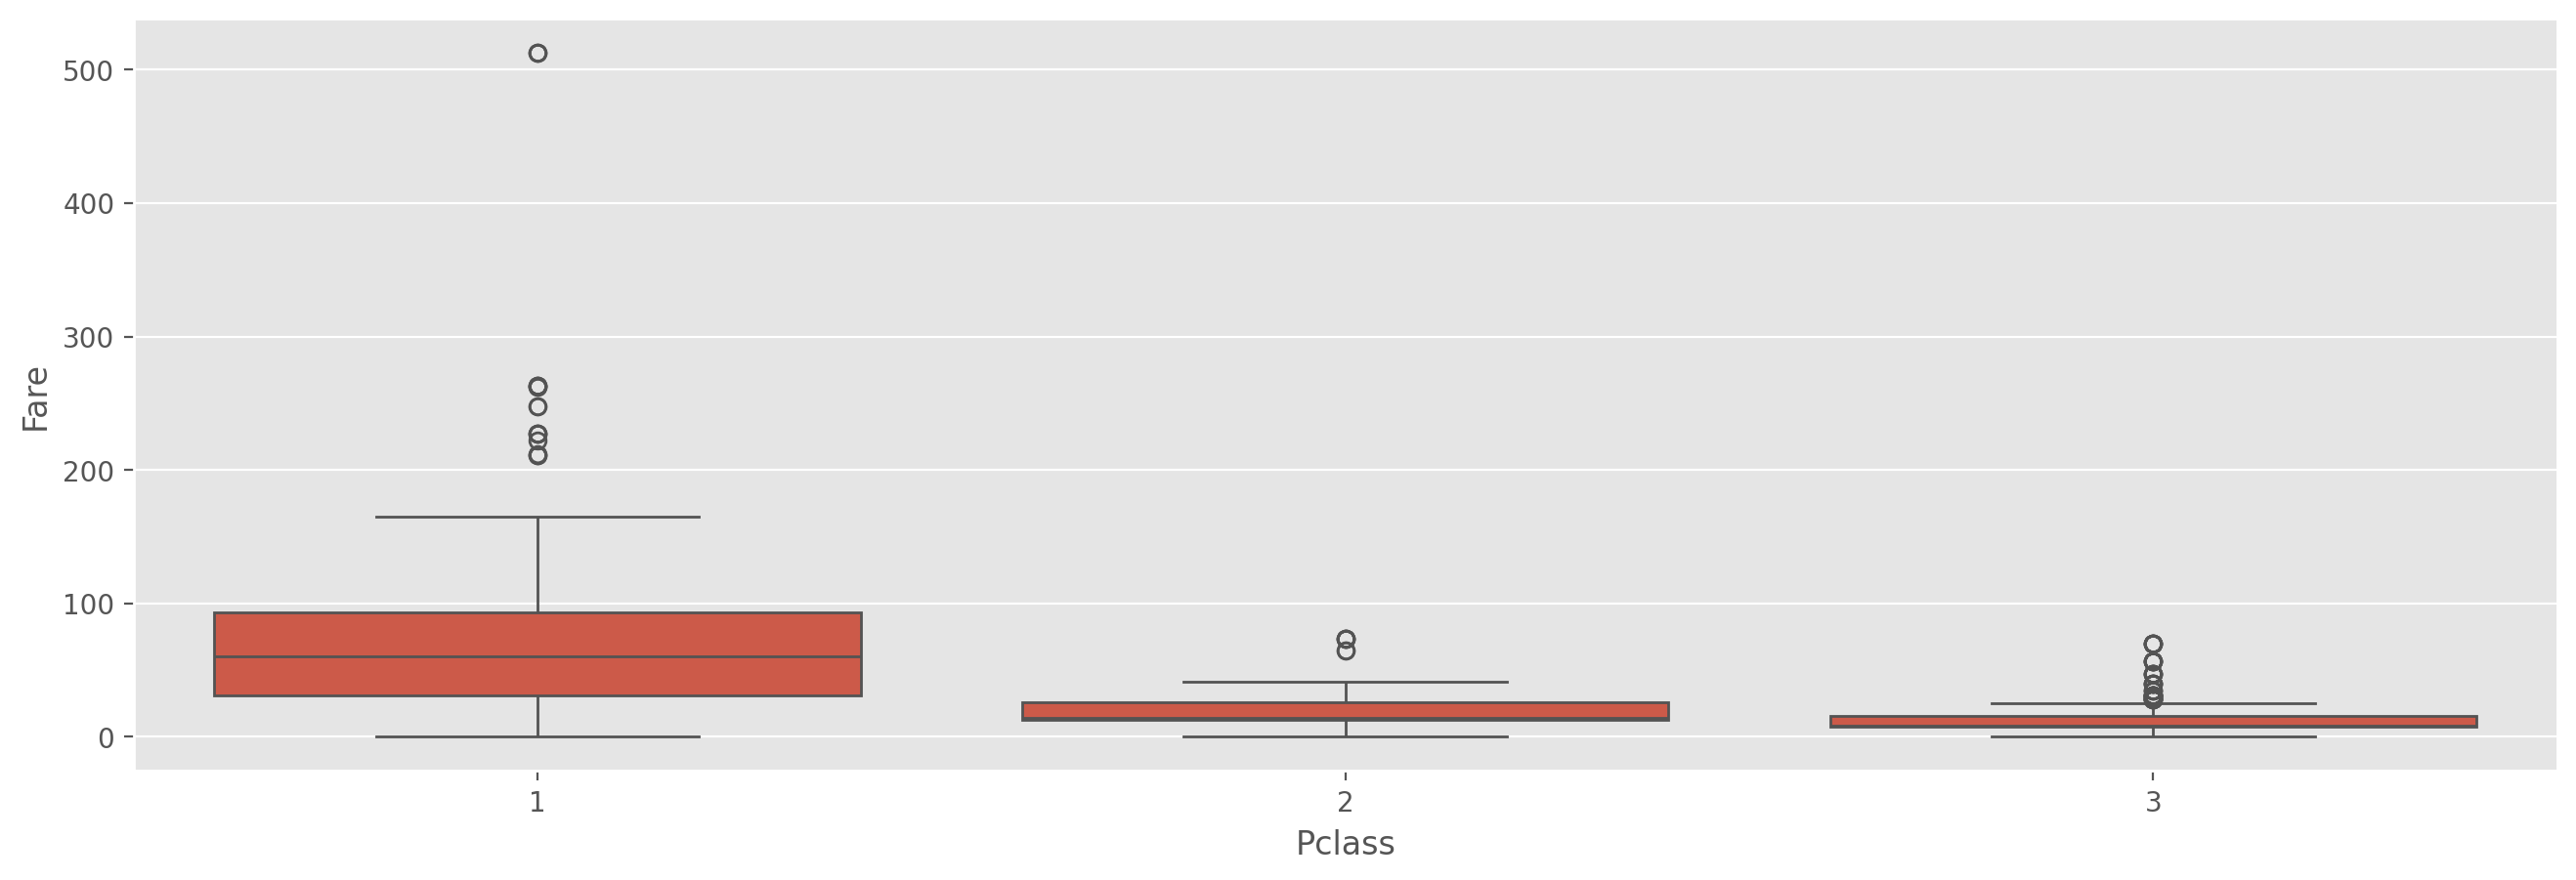

In [34]:
plt.figure(figsize=(16,5),dpi=200)
sns.boxplot(data=titanic,x='Pclass',y='Fare')

<Axes: xlabel='Pclass', ylabel='Fare'>

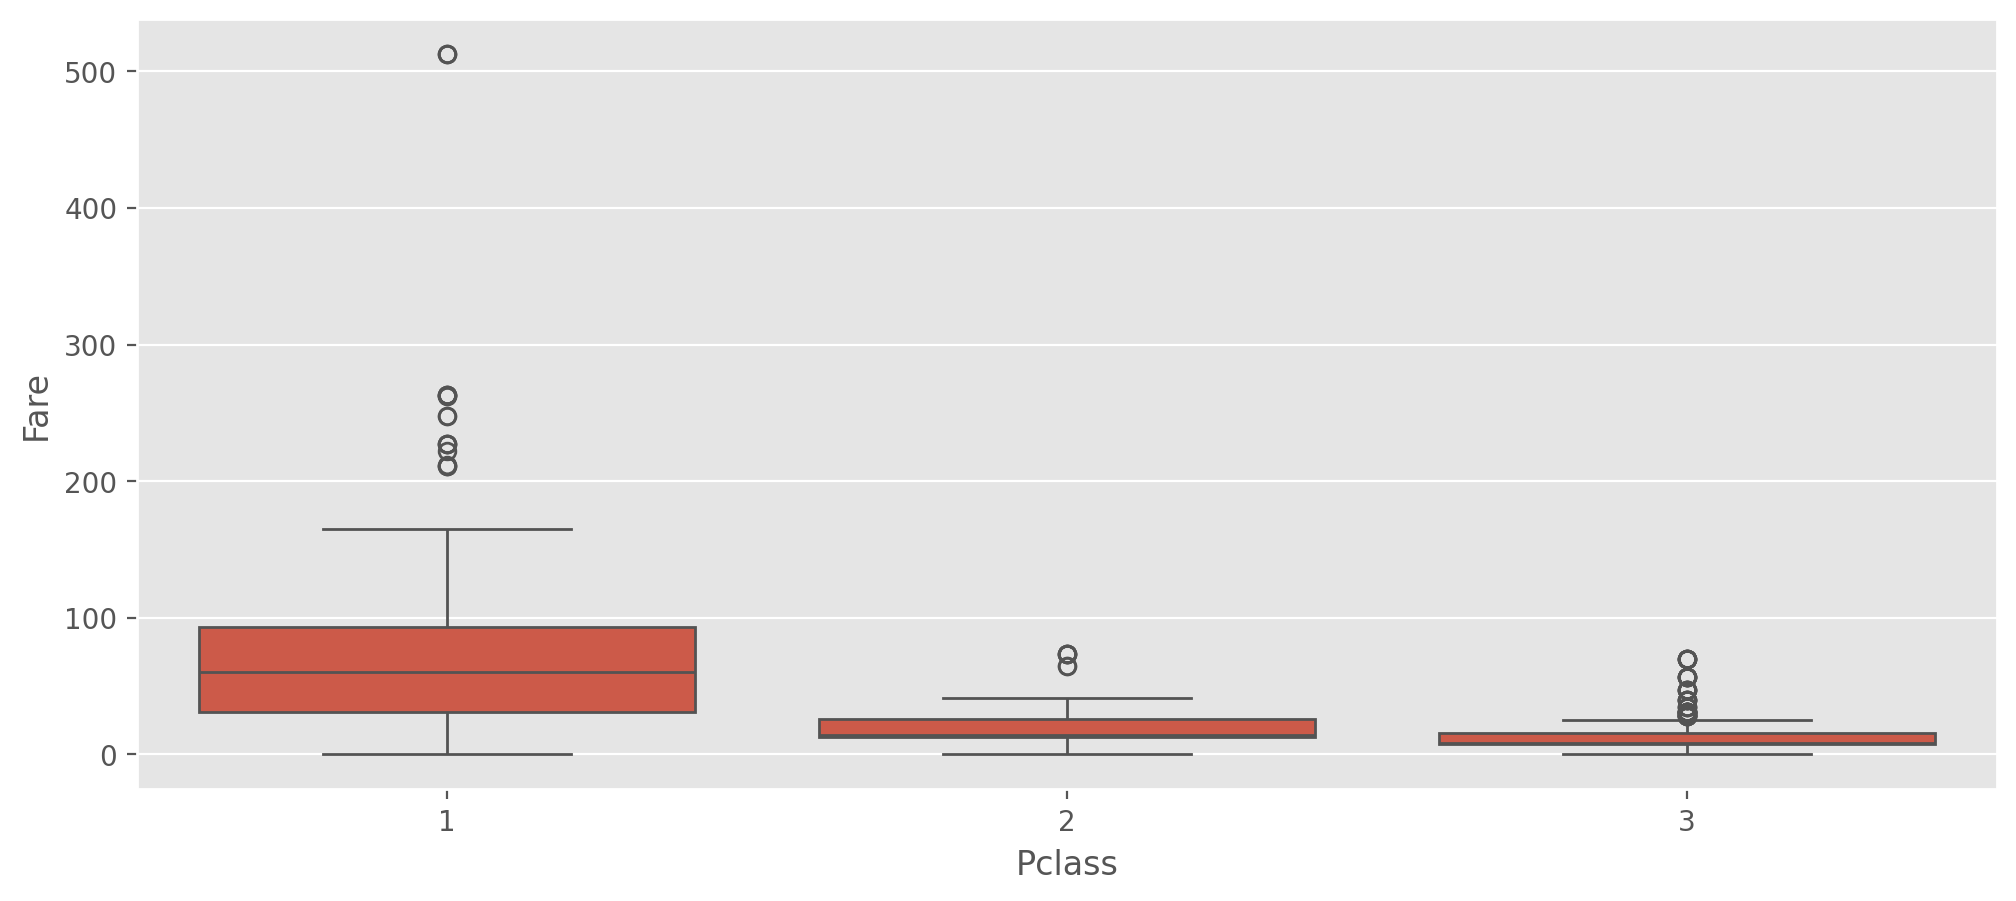

In [35]:
plt.figure(figsize=(12,5),dpi=200)
sns.boxplot(data=titanic,x='Pclass',y='Fare')

<Axes: xlabel='Survived', ylabel='Fare'>

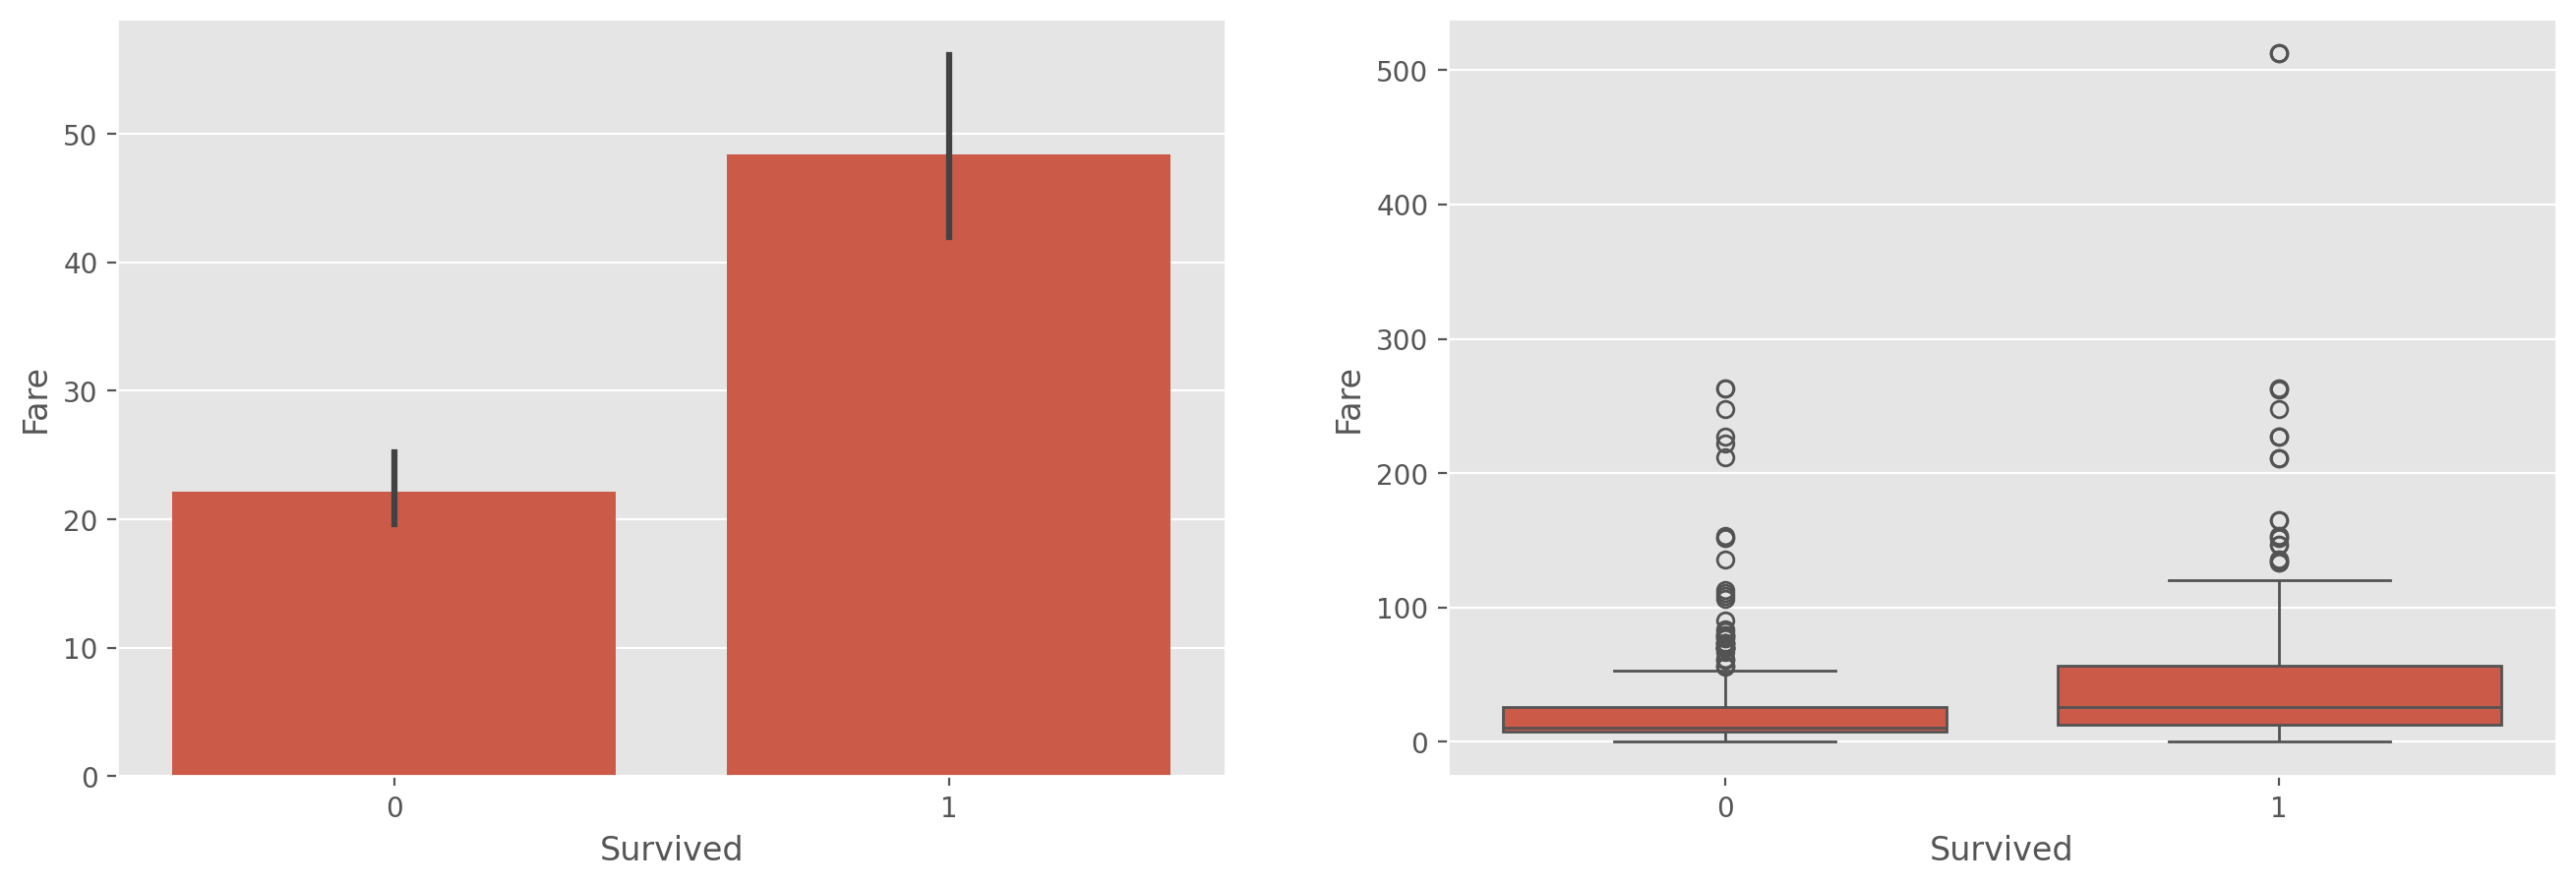

In [36]:
#Fare and Survived
plt.figure(figsize=(16,5),dpi=200)
plt.subplot(1,2,1)
sns.barplot(data=titanic,x='Survived',y='Fare')
plt.subplot(1,2,2)
sns.boxplot(data=titanic,x='Survived',y='Fare')

In [37]:
titanic[titanic.Fare>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
258,259,1,1,"Ward, Miss. Anna",female,35.0,PC 17755,512.3292,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,PC 17755,512.3292,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,PC 17755,512.3292,C,0


<Axes: ylabel='Age'>

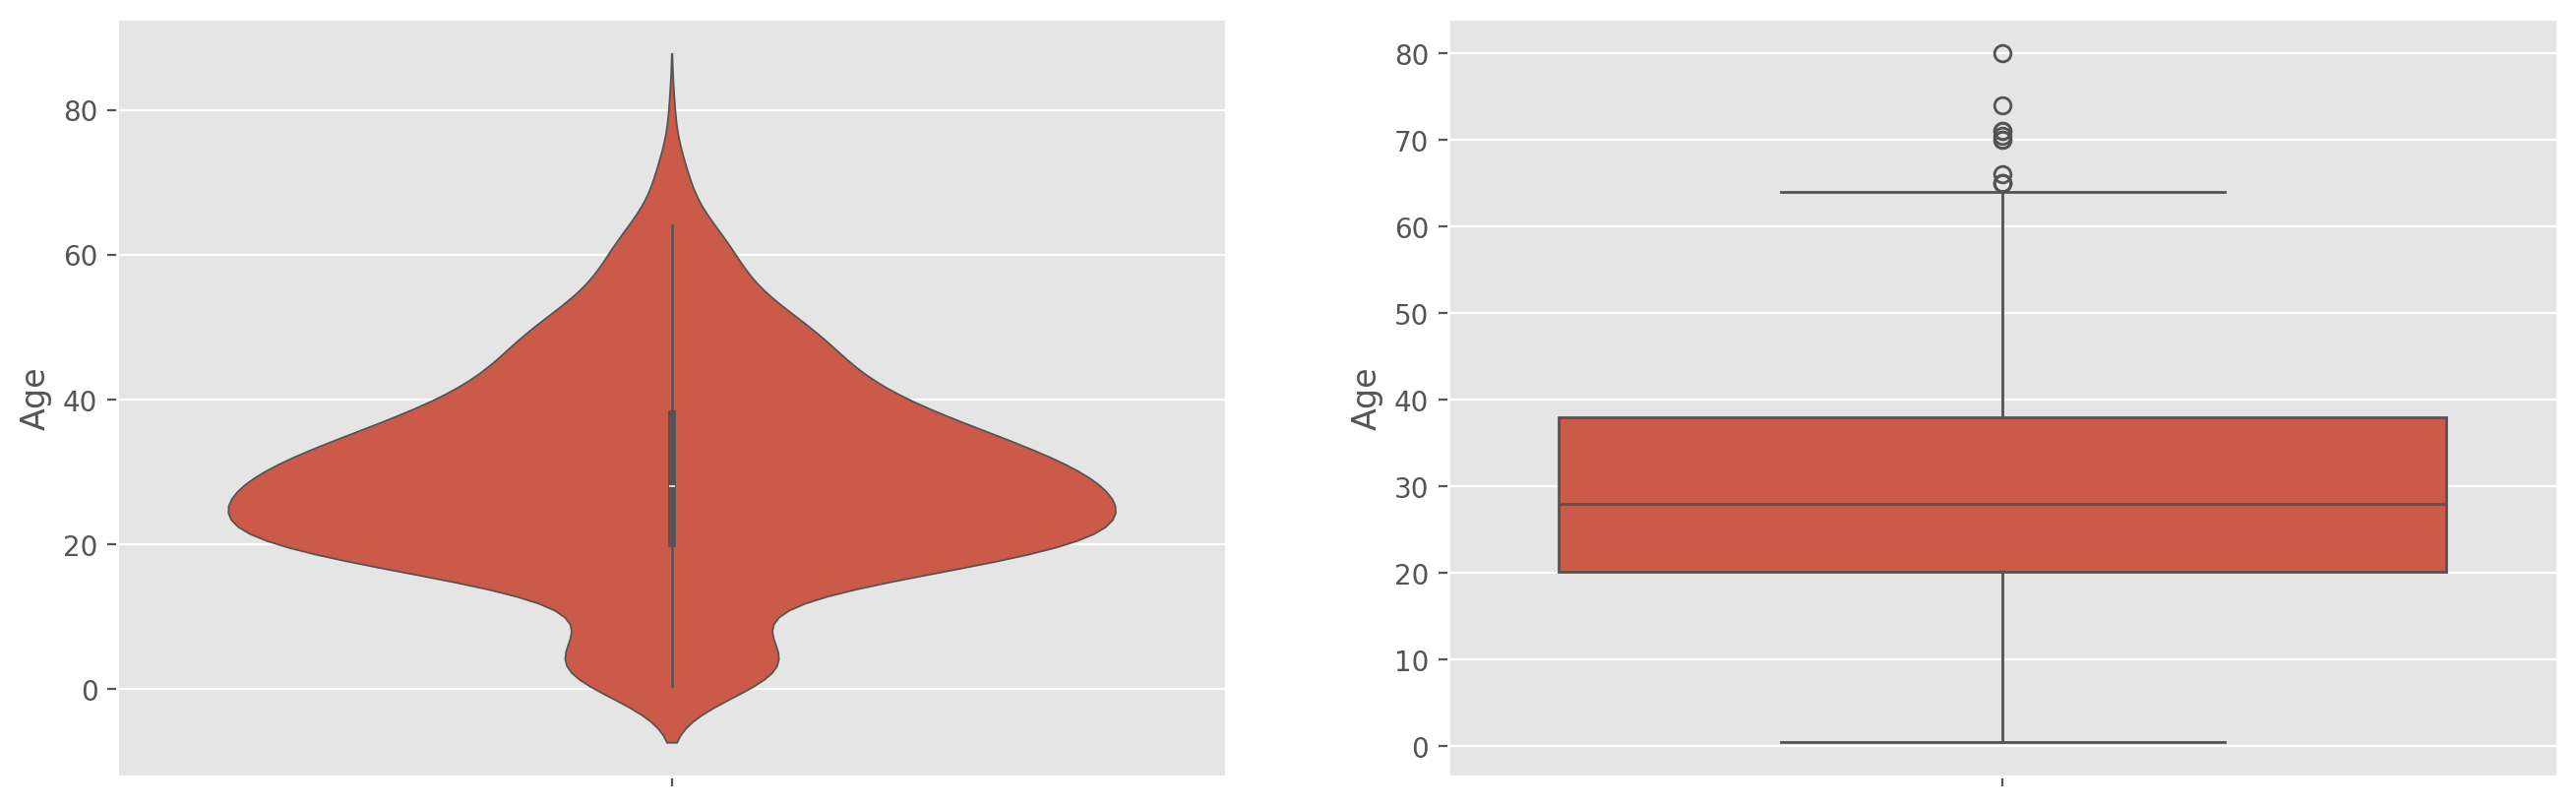

In [38]:
#Age
plt.figure(figsize=(16,5),dpi=200)
plt.subplot(1,2,1)
sns.violinplot(data=titanic,y='Age')
plt.subplot(1,2,2)
sns.boxplot(data=titanic,y='Age')

<Axes: xlabel='Survived', ylabel='Age'>

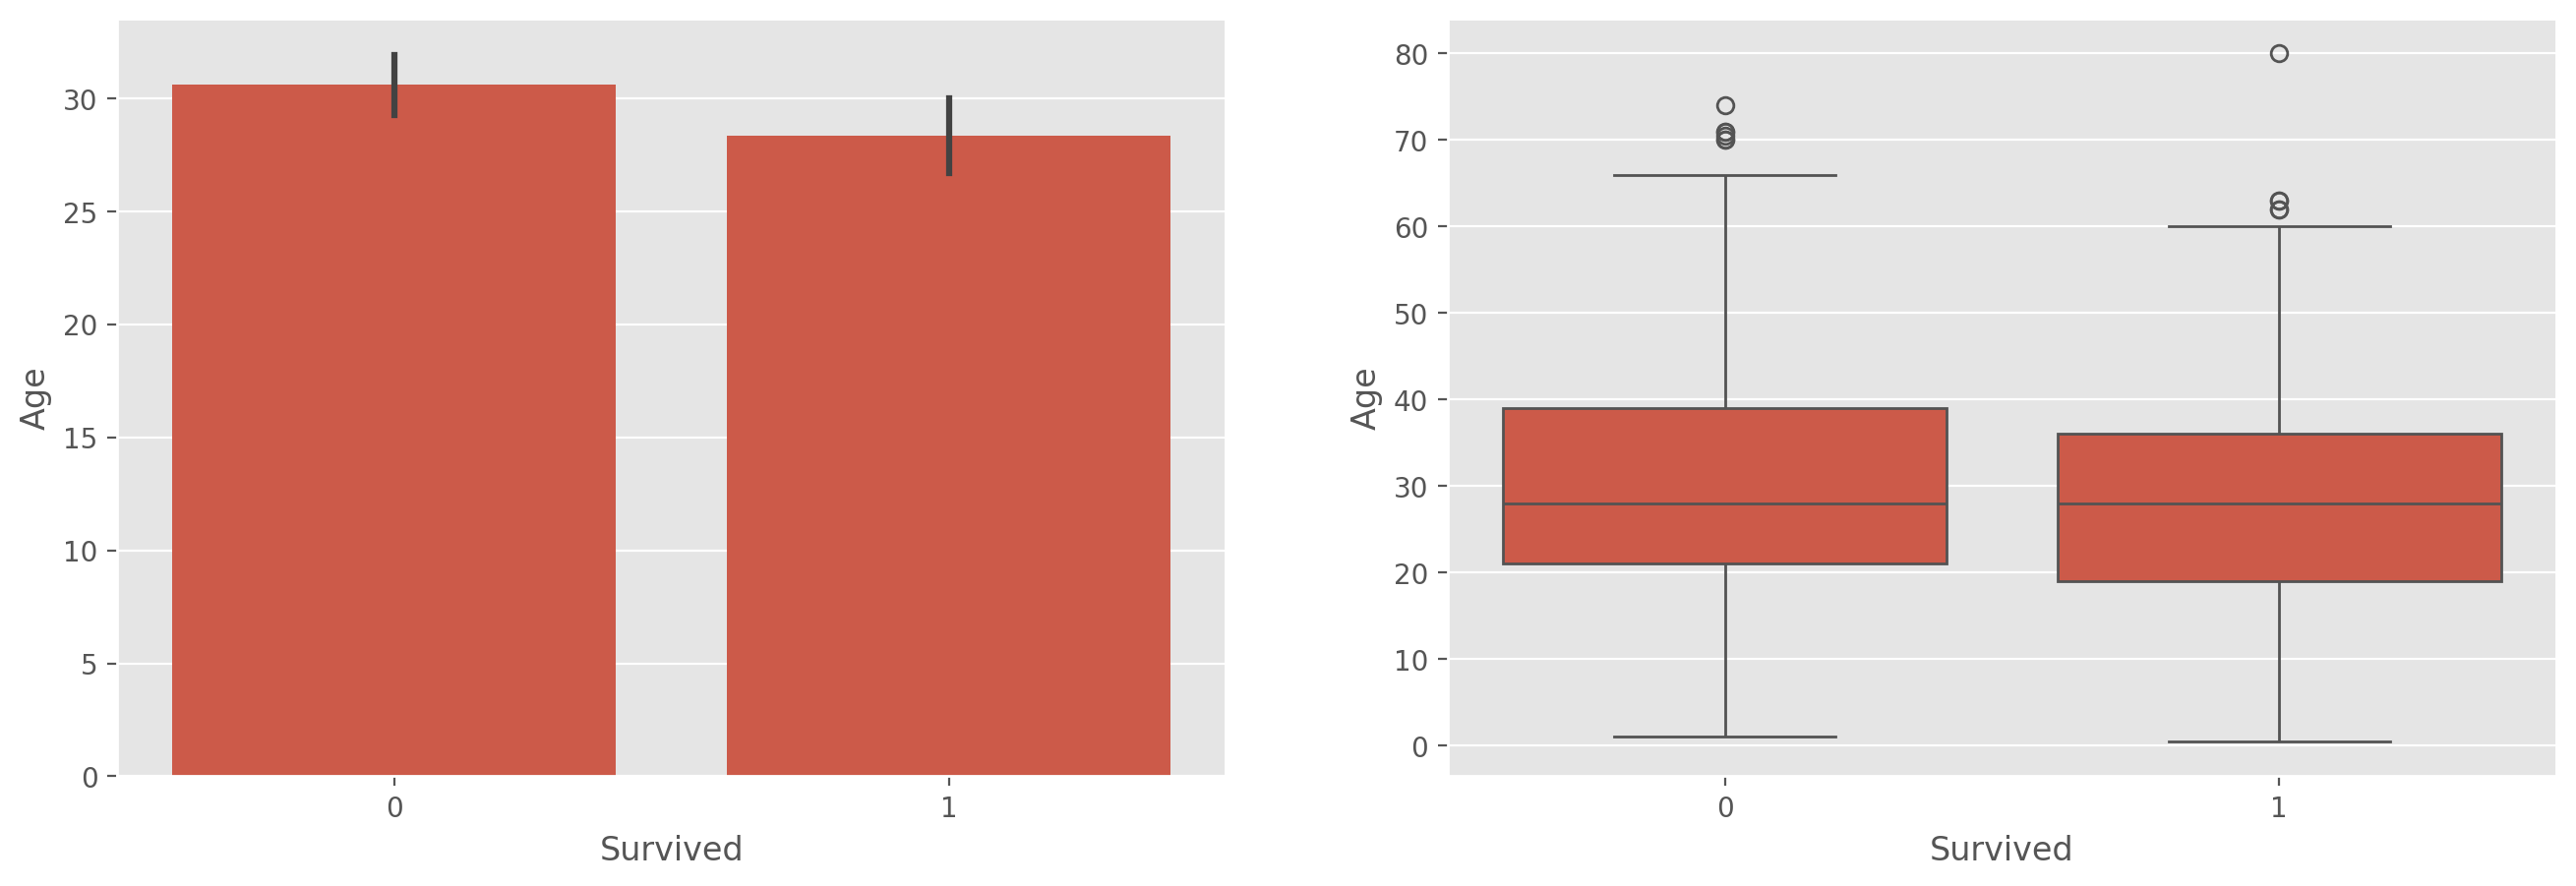

In [39]:
#Age and Survived
plt.figure(figsize=(16,5),dpi=200)
plt.subplot(1,2,1)
sns.barplot(data=titanic,x='Survived',y='Age')
plt.subplot(1,2,2)
sns.boxplot(data=titanic,x='Survived',y='Age')

<Axes: xlabel='family_members', ylabel='count'>

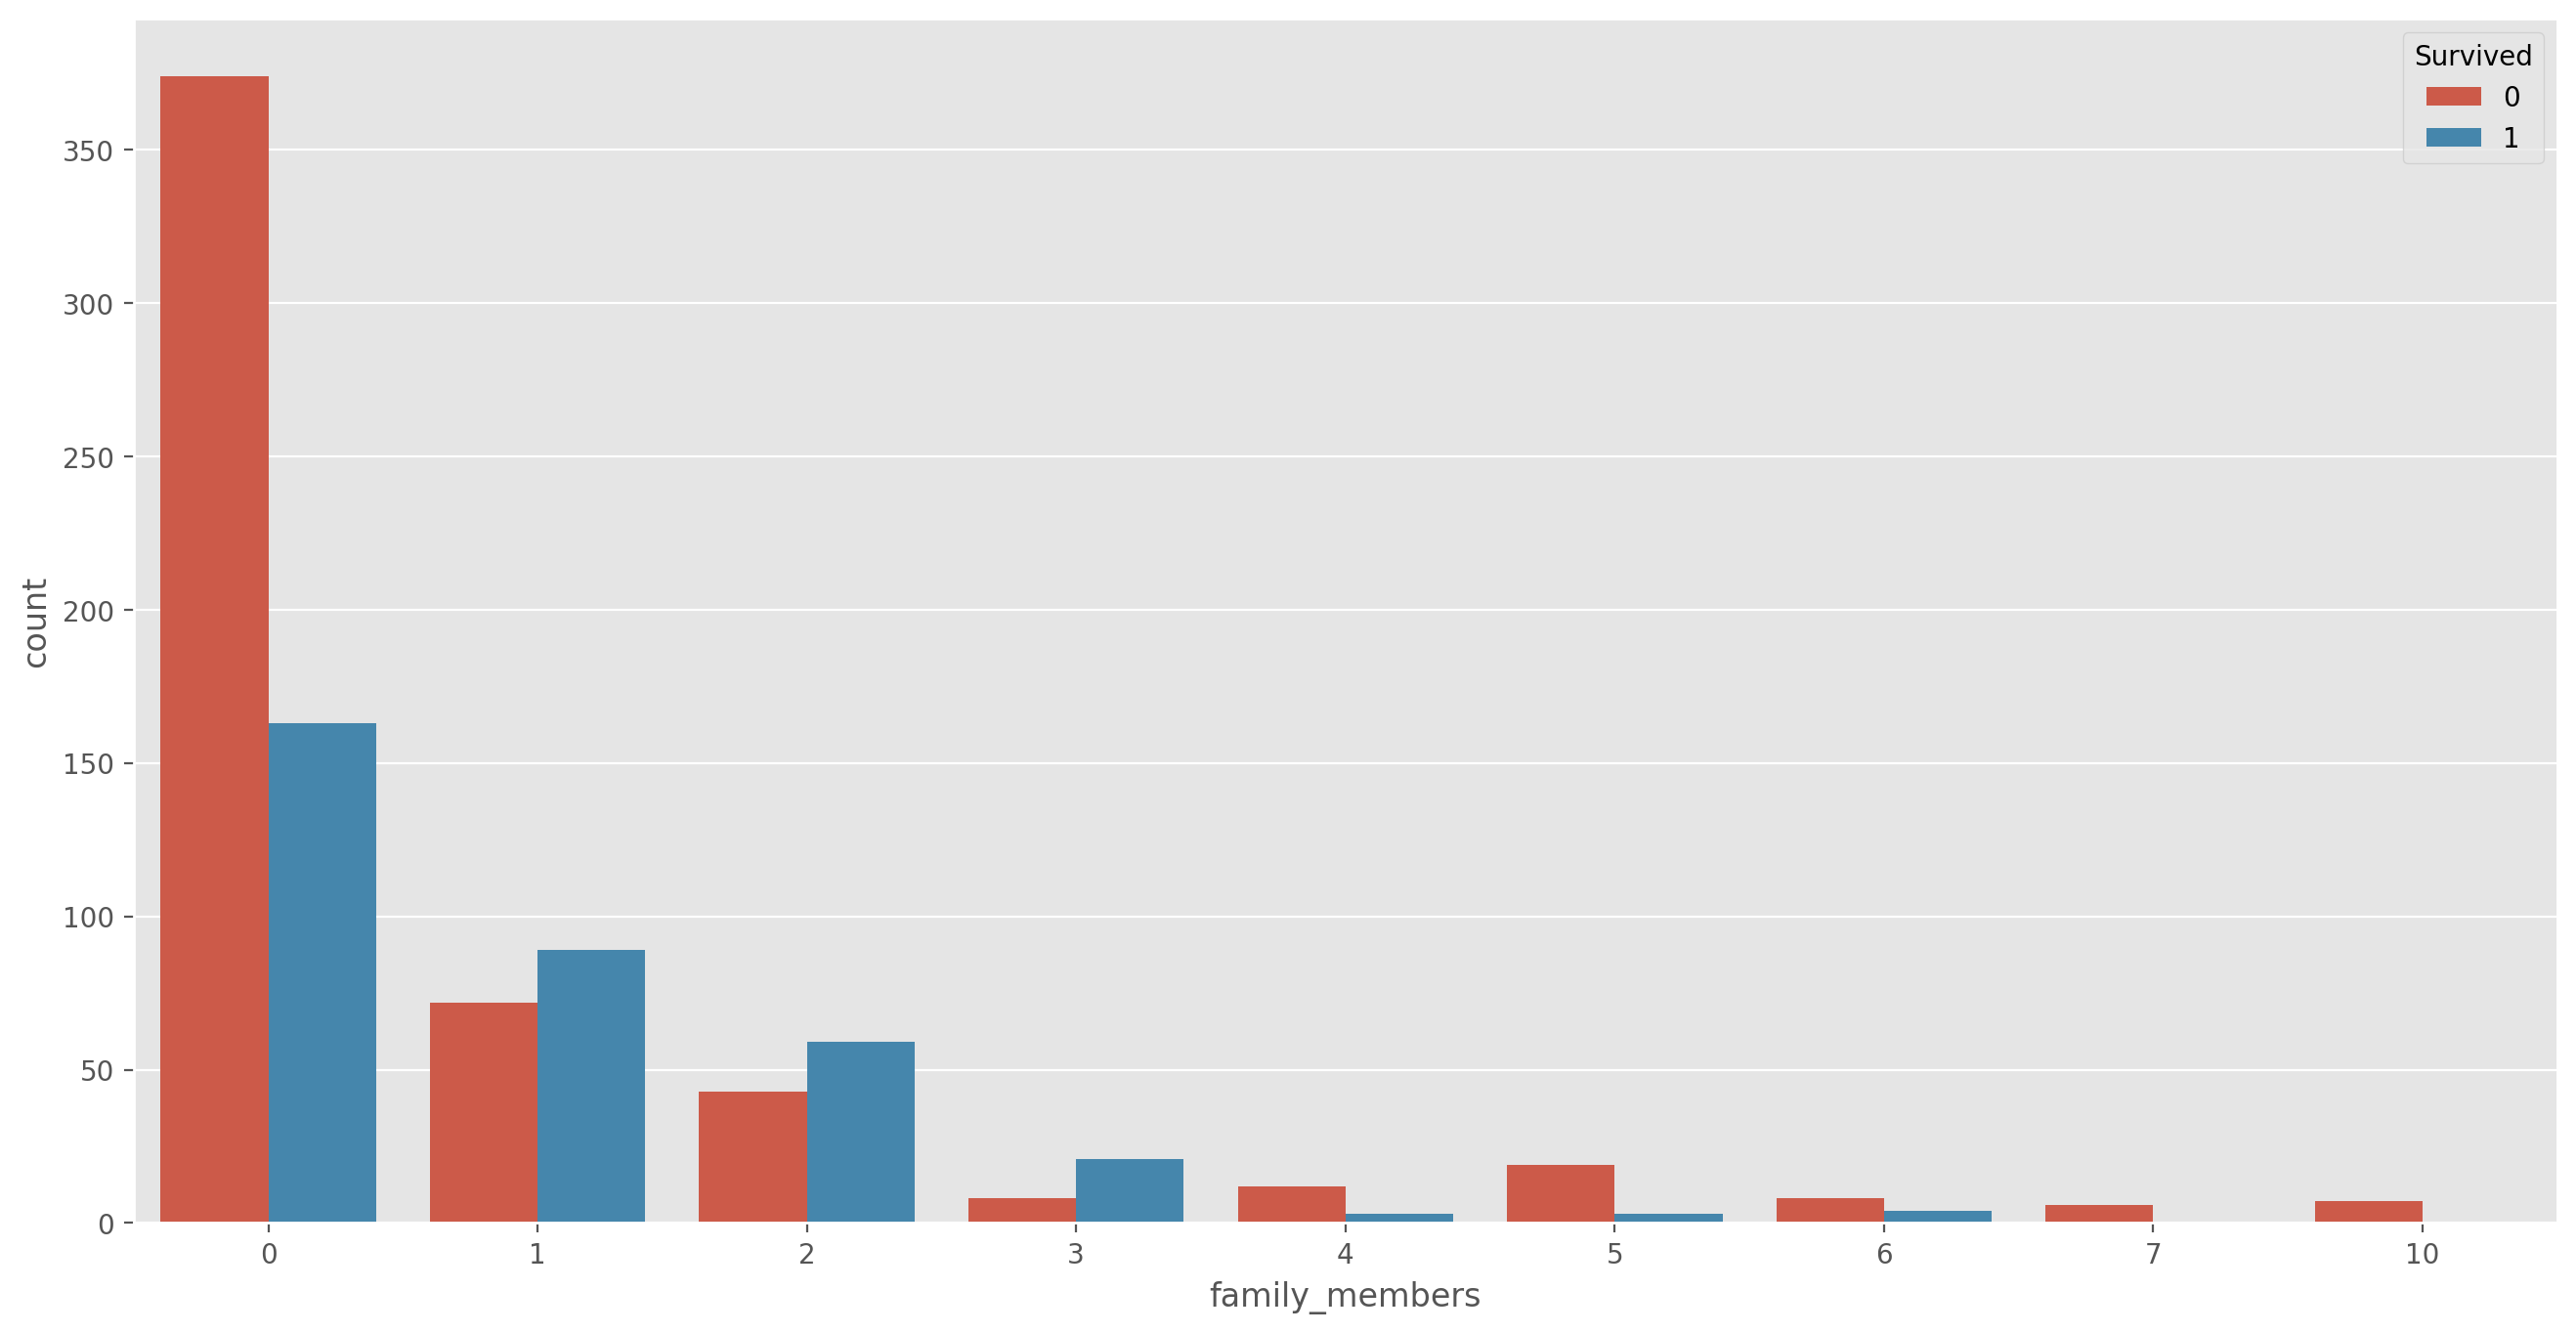

In [40]:
#family members and survived
plt.figure(figsize=(16,8),dpi=200)
sns.countplot(data=titanic,x='family_members',hue='Survived')
